My FinalYear project is going to be based on a trading strategy. I will be using the pair VIX NIKKEI and from there i will be developing a mean reversion strategy using machine learning and natural languance processing model.

First thing I will do is retrive the data and understand it as well as manipulate it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
 Vix = pd.DataFrame(yf.download('^VIX', start = '2023-1-1', end = '2025-1-1', interval = '1d'))
 nikkie = pd.DataFrame(yf.download('NKD=F', start = '2023-1-1', end = '2025-1-1', interval = '1d'))

 #Now we are going I am going to study only the adjusted close, that is the data we are going to use

 VixValues = Vix.Close
 NikkeiValues = nikkie.Close

 print(VixValues.describe())
 print(NikkeiValues.describe())

 #Now I check for any null values inside the data

 print(VixValues.isnull().sum())
 print(NikkeiValues.isnull().sum())

 #After seeing that there are no null values we know that the value the data is complete.
#Lastly we are going to check the shape to check if it matches

 print(VixValues.shape)
 print(NikkeiValues.shape)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker        ^VIX
count   502.000000
mean     16.236295
std       3.311072
min      11.860000
25%      13.582500
50%      15.400000
75%      18.444999
max      38.570000
Ticker         NKD=F
count     503.000000
mean    34536.699801
std      4365.217708
min     25710.000000
25%     31830.000000
50%     33675.000000
75%     38587.500000
max     42510.000000
Ticker
^VIX    0
dtype: int64
Ticker
NKD=F    0
dtype: int64
(502, 1)
(503, 1)


Here I am going to visualize the data to understand its behaviour

In [3]:
#Here I am obteining the returns of the price in a 1 day period over 2 years
#And its volatility over the two years of each month to check for similarities

VixReturns = VixValues / VixValues.shift(1)
VixReturns = VixReturns.dropna()

VixVolatility = VixValues.pct_change().rolling(window = 21).std()
VixVolatility = VixVolatility.dropna()



NikkeiReturns = NikkeiValues / NikkeiValues.shift(1)
NikkeiReturns = NikkeiReturns.dropna()

NikkeiVolatility = NikkeiValues.pct_change().rolling(window = 21).std()
NikkeiVolatility = NikkeiVolatility.dropna()

#Here I will print the values for the returns and volatility as well as checking for null values

print(VixReturns,NikkeiReturns)
print(VixVolatility, NikkeiVolatility)

Ticker          ^VIX
Date                
2023-01-04  0.961135
2023-01-05  1.020445
2023-01-06  0.940784
2023-01-09  1.039754
2023-01-10  0.936732
...              ...
2024-12-24  0.850417
2024-12-26  1.032235
2024-12-27  1.082824
2024-12-30  1.090909
2024-12-31  0.997126

[501 rows x 1 columns] Ticker         NKD=F
Date                
2023-01-04  1.001743
2023-01-05  0.994200
2023-01-06  1.018864
2023-01-09  1.001145
2023-01-10  1.002288
...              ...
2024-12-24  0.998731
2024-12-26  1.011436
2024-12-27  1.010553
2024-12-30  0.982844
2024-12-31  0.998862

[502 rows x 1 columns]
Ticker          ^VIX
Date                
2023-02-02  0.047810
2023-02-03  0.047403
2023-02-06  0.049321
2023-02-07  0.048435
2023-02-08  0.049067
...              ...
2024-12-24  0.184751
2024-12-26  0.184430
2024-12-27  0.184704
2024-12-30  0.185315
2024-12-31  0.184830

[481 rows x 1 columns] Ticker         NKD=F
Date                
2023-02-02  0.009593
2023-02-03  0.009588
2023-02-06  0.009368
2023

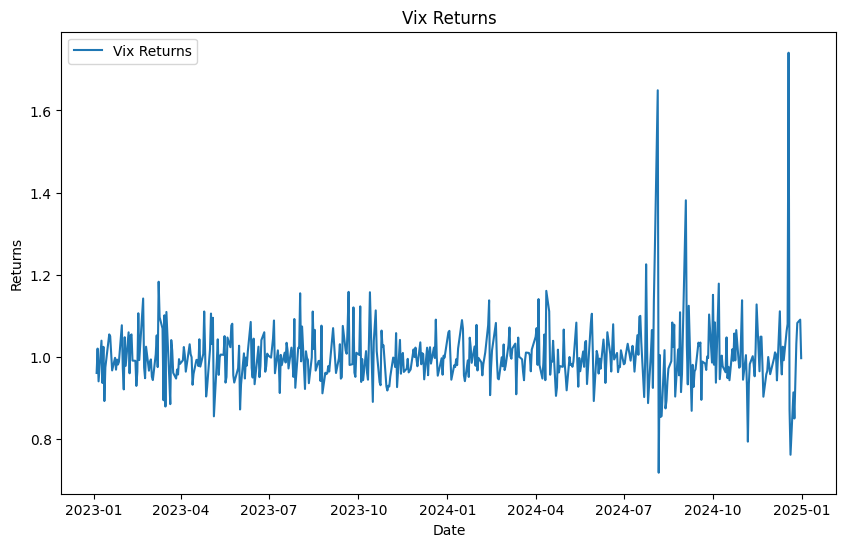

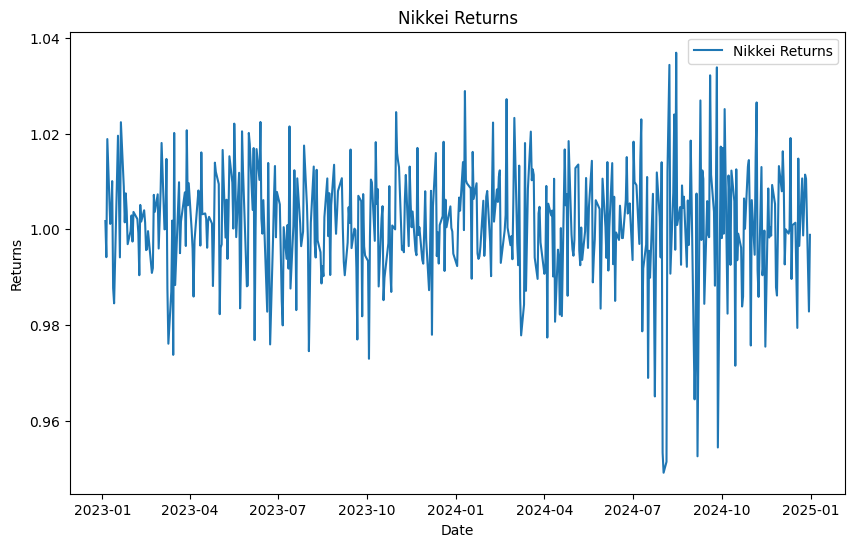

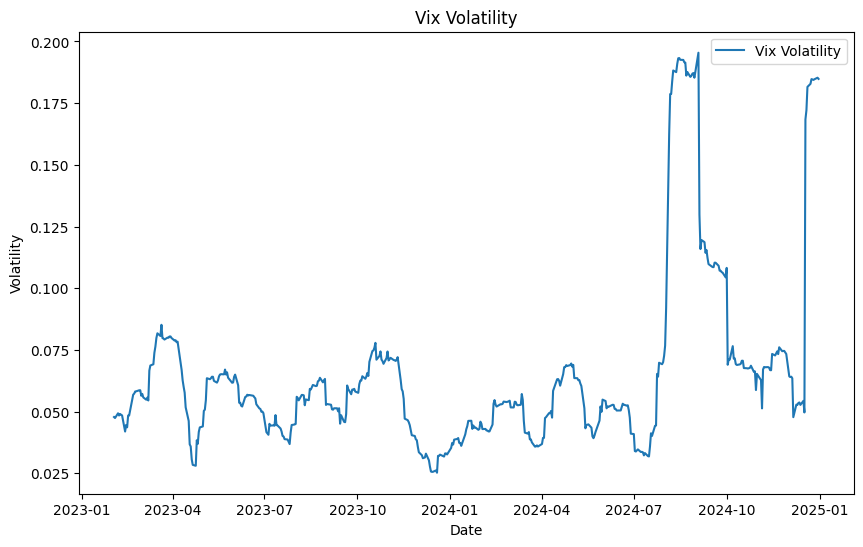

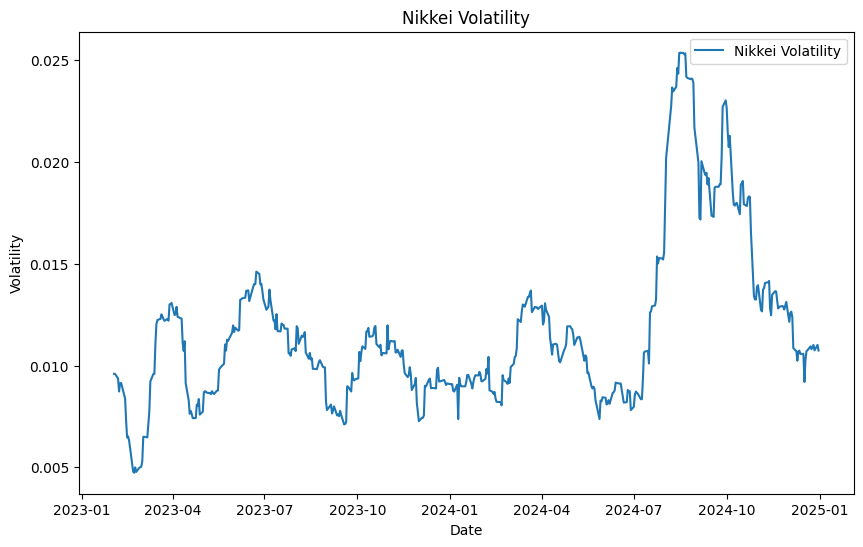

In [4]:
#After calculating the returns and the volatility I decide to plot it to visualize it.

plt.figure(figsize = (10,6))
plt.plot(VixReturns, label = 'Vix Returns')
plt.title('Vix Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()



plt.figure(figsize = (10,6))
plt.plot(NikkeiReturns, label = 'Nikkei Returns')
plt.title('Nikkei Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

plt.figure(figsize = (10,6))
plt.plot(VixVolatility, label = 'Vix Volatility')
plt.title('Vix Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()

plt.figure(figsize = (10,6))
plt.plot(NikkeiVolatility, label = 'Nikkei Volatility')
plt.title('Nikkei Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()


plt.show()

After seeing that there are some similiarities in the times where the volume and returns spike, I will check for its corralation and conitegration between both

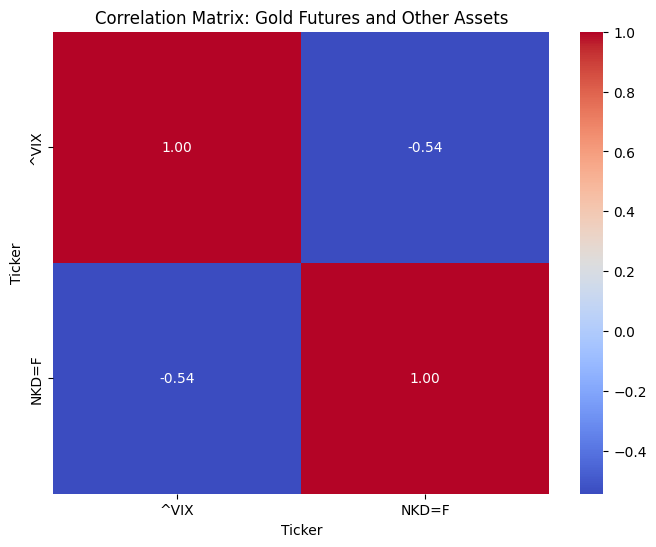

Cointegration Test Statistic: -13.172409391545417
P-value: 1.2695262667726015e-23
Critical Values: [-3.91847791 -3.34837749 -3.05294328]


In [5]:
#Checking for corralation between both, first I will had the returns to the same dataframe

Returns = pd.DataFrame(VixReturns, index = VixReturns.index)
Returns['NKD=F'] = NikkeiReturns
Returns.head()

#Creating the corralation matrix

corralation_matrix = Returns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corralation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Gold Futures and Other Assets")
plt.show()

# To check for cointegration we need to do the Engle-Grnager test.

import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

#Here I perform the test

coint_t,p_value,critical_values = coint(Returns['^VIX'], Returns['NKD=F'])

print(f"Cointegration Test Statistic: {coint_t}")
print(f"P-value: {p_value}")
print(f"Critical Values: {critical_values}")

After runing the corralation and cointegration we can see that they are both corralated and cointegrated at the same time.

 To check for the corralation we just need to see at the matrix, as we can see we get values of -0.54 meaning that they both have a negative corralation

 In terms of the cointegration we need to check for the p_value of the Engle-Granger test. As we can see we fail to reject the null hypothesis and we can say that both have a long-term relationship, meaning they are cointegrated.



The last thing of visulaization to do is to plot both of them with their price scaled and see if there are some movements relevant for mean-reversion.

In [6]:
pip install scikit-learn

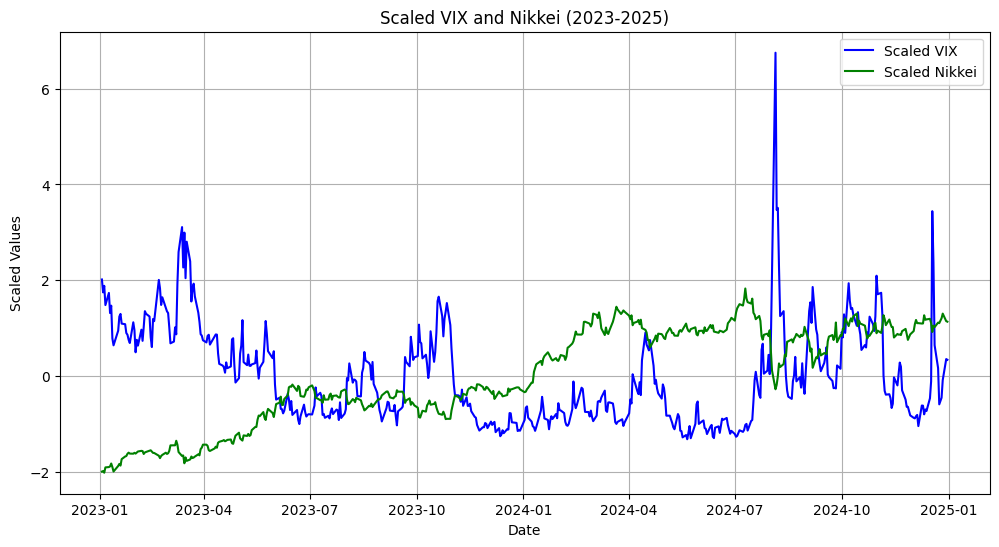

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


Prices = pd.DataFrame(VixValues, index = VixValues.index)
Prices['NKD=F'] = NikkeiValues

#Here I are scaling the data using a standard scaler
scaled_prices = scaler.fit_transform(Prices)
scaled_prices = pd.DataFrame(scaled_prices, columns = Prices.columns, index = Prices.index)


plt.figure(figsize=(12, 6))
plt.plot(scaled_prices['^VIX'], label='Scaled VIX', color='blue')
plt.plot(scaled_prices['NKD=F'], label='Scaled Nikkei', color='green')
plt.title('Scaled VIX and Nikkei (2023-2025)')
plt.xlabel('Date')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.show()



The next step is retrieving sentimental data, this is the data we are going to use in our natural language processing model where it will give it a score depending on the importance

In [8]:
pip install requests pandas transforms

In [9]:
#Retrieving the data with an API-Key for news

import requests

API_KEY = "040662afeb88429db4f702eae6a96455" #This key dosnt offer real time data, just data from when you request it
QUERY = "VIX OR United States stock market" # This is tells the api to look for titles containing those key words.
URL = f"https://newsapi.org/v2/everything?q={QUERY}&language=en&sortBy=publishedAt&apiKey={API_KEY}"

#Retrieving the news
response = requests.get(URL)
data = response.json()

##Extracting the relevant infomration
articles = data["articles"]
news_data = [{"date": article["publishedAt"], "title": article["title"], "content": article["description"]} for article in articles]

# Converting it to DataFrame
News = pd.DataFrame(news_data)
print(News.tail())

#I will check for the size
print(News.shape)


                    date                                              title  \
95  2025-02-11T08:54:55Z  Sylvest Advisors LLC Takes $682,000 Position i...   
96  2025-02-11T08:54:54Z  abrdn plc Has $1.79 Million Stock Position in ...   
97  2025-02-11T08:54:54Z  Avantra Family Wealth Inc. Purchases Shares of...   
98  2025-02-11T08:54:53Z  Spire Wealth Management Grows Stock Position i...   
99  2025-02-11T08:54:53Z  Journey Strategic Wealth LLC Has $6.04 Million...   

                                              content  
95  Sylvest Advisors LLC purchased a new position ...  
96  abrdn plc lifted its stake in shares of Essent...  
97  Avantra Family Wealth Inc. acquired a new posi...  
98  Spire Wealth Management raised its position in...  
99  Journey Strategic Wealth LLC raised its stake ...  
(100, 3)


As we can see we get data only from the last day, this can allow us to understand where the market will likely tend to and what can affect it.

Now after retrieving news data and understanding it, we are going to give it a score value. This will then be used in our models. I will achive this by using FinBERT a deeplearning model focused in natural language processing.

In [10]:
from transformers import pipeline

sentiment_pipeline = pipeline("text-classification", model="ProsusAI/finbert")

News["sentiment"] = News["title"].apply(lambda x: sentiment_pipeline(x)[0]['label'])
News["sentiment_score"] = News["title"].apply(lambda x: sentiment_pipeline(x)[0]['score'])

News

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


,date,title,content,sentiment,sentiment_score
0,2025-02-11T11:08:47Z,Cincinnati Financial Co. (NASDAQ:CINF) Stock H...,State of Alaska Department of Revenue reduced ...,negative,0.499582
1,2025-02-11T11:05:28Z,Organigram Reports First Quarter Fiscal 2025 R...,17% growth in net revenue to $42.7 million yea...,neutral,0.933994
2,2025-02-11T11:03:09Z,Jacobs Solutions Inc. (NYSE:J) Shares Purchase...,Mirae Asset Global Investments Co. Ltd. increa...,neutral,0.945876
3,2025-02-11T11:03:09Z,Synchrony Financial (NYSE:SYF) Stake Reduced b...,Choreo LLC reduced its stake in shares of Sync...,neutral,0.867954
4,2025-02-11T11:03:09Z,Mirae Asset Global Investments Co. Ltd. Increa...,Mirae Asset Global Investments Co. Ltd. booste...,positive,0.893763
...,...,...,...,...,...
95,2025-02-11T08:54:55Z,"Sylvest Advisors LLC Takes $682,000 Position i...",Sylvest Advisors LLC purchased a new position ...,neutral,0.950112
96,2025-02-11T08:54:54Z,abrdn plc Has $1.79 Million Stock Position in ...,abrdn plc lifted its stake in shares of Essent...,neutral,0.945336
97,2025-02-11T08:54:54Z,Avantra Family Wealth Inc. Purchases Shares of...,Avantra Family Wealth Inc. acquired a new posi...,neutral,0.945524
98,2025-02-11T08:54:53Z,Spire Wealth Management Grows Stock Position i...,Spire Wealth Management raised its position in...,neutral,0.708759


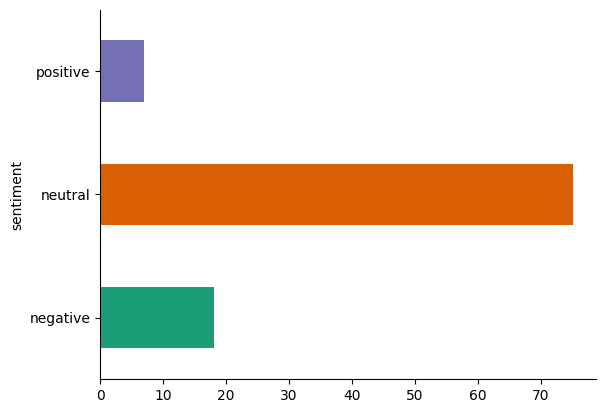

In [11]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
News.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

As we can see in the predictions of the deep learning modelm, the table show :

sentiment --> Means how it can affect the market.                                
sentiment_score  --> Means how accurate the models thiks he is.

In this stage, after retreaving all the data needed, making sure its aligned and that it has the necessary values. I can begin craeting the mean-reversion algorithm

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


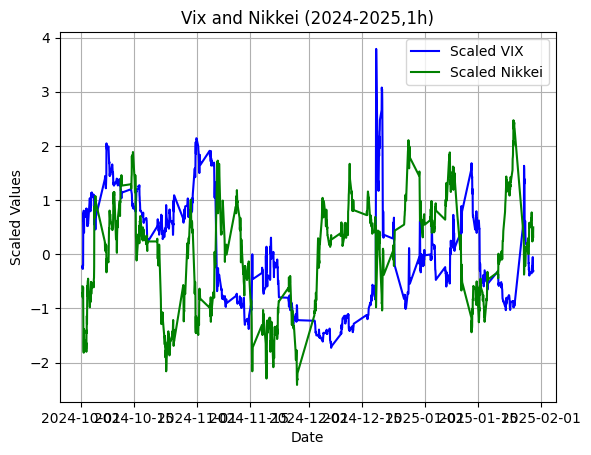

In [31]:
#Retrieving data from a smaller time frame
#This is done because I dont whant it to take into account events that happened in the past
vixTrade = pd.DataFrame(yf.download('^VIX', start = '2024-10-1', end = '2025-1-30', interval = '1h'))
nikkieTrade = pd.DataFrame(yf.download('NKD=F', start = '2024-10-1', end = '2025-1-30', interval = '1h'))

vixTradeValues = vixTrade.Close
nikkieTradeValues = nikkieTrade.Close

#Scaling the values to create the sequence

TradedValues = pd.DataFrame(vixTradeValues, index = vixTradeValues.index)
TradedValues['NKD=F'] = nikkieTradeValues
TradedValues = TradedValues.dropna()


Scaled_TradedValues = scaler.fit_transform(TradedValues)
Scaled_TradedValues = pd.DataFrame(Scaled_TradedValues, columns = TradedValues.columns, index = TradedValues.index)

Scaled_TradedValues.head()


#Now we plot just to viualize its movement in a shorter timeframe

plt.plot(Scaled_TradedValues['^VIX'], label='Scaled VIX', color='blue')
plt.plot(Scaled_TradedValues['NKD=F'], label='Scaled Nikkei', color='green')
plt.title('Vix and Nikkei (2024-2025,1h)')
plt.xlabel('Date')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.show()





Now we are going to define the spread, for this we need to make sure its a fair value and this is done to make sure that the relationships between the two assets is adjusted. For this we will use a OLS model.

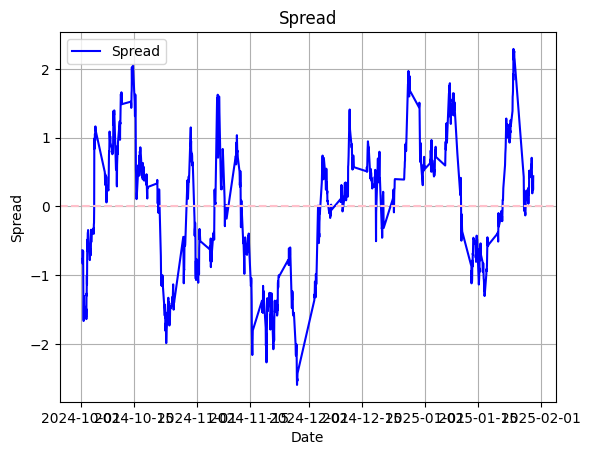

In [32]:

import statsmodels.api as sm

#Addint the intercet for the vix and the creation of the OLS

x = sm.add_constant(Scaled_TradedValues['^VIX'])
y= Scaled_TradedValues['NKD=F']

#Now I fit the model

model = sm.OLS(y,x).fit()

#I get the coeficinets

alpha, beta = model.params

model.summary()


#We store the values of the fair value of the nikkei

Scaled_TradedValues['FairValues_NKD=F'] = alpha + beta * Scaled_TradedValues['^VIX']


spread = Scaled_TradedValues['NKD=F'] - Scaled_TradedValues['FairValues_NKD=F']

mean_spread = spread.mean()

plt.plot(spread, label='Spread', color='blue')
plt.title('Spread')
plt.axhline(y=mean_spread, color='pink', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.show()

Now after calculating the spread we are going to first check if its stationary,this is one of the most important topics for mean-reversion strategies

In [33]:
from statsmodels.tsa.stattools import adfuller

#This is the Adam fuller test, this helps us understand if the data is stationary or not, this is a very key point of the mean-reversion strategy.
adf_test = adfuller(spread)

print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")


ADF Statistic: -3.44719380289118
p-value: 0.009451468118711283


After doing the adfuller test and confirming that the spread is stationary, I am going to define the upper and lower bands for the trading model. In the case that the data was not stationary we would have to difference it



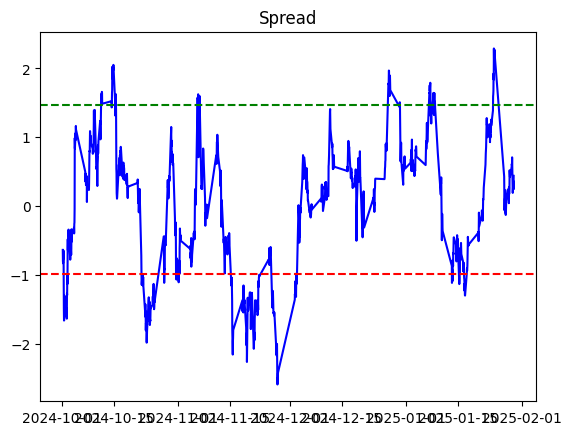

In [35]:
# I create a database that stores the values of the spread
df_spread = pd.DataFrame(spread, index = Scaled_TradedValues.index, columns = ['Spread'])
df_spread.head()

#Now I am going to define the upper and lower bands of the strategy

upperbound = spread.mean() + 1.5 * spread.std()
lowerbound = spread.mean() - 1 * spread.std()

plt.plot(spread, label='Spread', color='blue')
plt.title('Spread')
plt.axhline(y=upperbound, color='green', linestyle='--')
plt.axhline(y=lowerbound, color='red', linestyle='--')

As we can see in the plot, the spread does actually touch the barriers and then revert to the mean. What we are goign to do know is use the VAR model as a confirmation of the reversion of the spread.

With the VAR model, I am going to predict the next value X (t+1) when the spread crosses a barrier, if the model confirms the reversion of the trade I am going to enter the trade, I will define a second barrier.

In [16]:
#from statsmodels.tsa.api import VAR

#Here I create the var model
#First I need to create a database for the spread

#df_spread = pd.DataFrame(spread, index = Scaled_TradedValues.index, columns = ['Spread'])
#df_spread.head()

#Inisde the VAR model we are going to have the price of the  VIX and the price of the NIKKEI to see how the influence each other

#model = VAR(Scaled_TradedValues[['NKD=F','^VIX']])
#lag_Selection = model.select_order(maxlags = 10)
#lag_Selection.summary()

#I run this code letting the selection of lag use the AIC criteria to chose the best lag for my case.
#lag = lag_Selection.aic

#Now that I know the lag number I create the var_model

#var_model = model.fit(lag)
#var_model.summary()


Now that I have calculate the values of the lags necessary for the VAR model, I will utilize this to predict the value of the spread and use this in my mean reversion strategy.